#                    **Marketing Campaign for Banking Products**

  The bank has a growing customer base. The bank wants to increase 
customers base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**AIM**:

1.   To sell more loan products to bank customer.
2.   To devise campaigns to better target marketing to increase success ration with minimal budget.
3.   To identify customers wh have higher probability of purchasing the loan.


    

The dataset contains data on 5000 customers.Among these 5000 customers, only 480 accepted the personal loan that was
offered to them in the earlier campaign.
So, we have to increase success ratio of campaign but at the same time we have to reduce cost of campaign.

### **IMPORTING LIBRARIES**

In [ ]:
#Importing libraries

import numpy as np                    
import pandas as pd                   
import scipy.stats as stat            
import seaborn as sns                 
import matplotlib.pyplot as plt       
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn import metrics   
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score 
from sklearn.metrics import classification_report

In [ ]:
#Importing files

from google.colab import files
upload = files.upload() 

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [ ]:
#Importing data

import io
dataset = pd.read_csv(io.BytesIO(upload['Bank_Personal_Loan_Modelling.csv']))

### **DATA INSPECTON**

In [ ]:
#To represent dimension of dataset

dataset.shape

(5000, 14)

In [ ]:
#To represent first five columns in dataset

dataset.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#To represent last five columns in dataset

dataset.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#To represent data types and non-null in dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#To represent statistical summary of dataset

dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#To represent number of missing values in dataset

dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#To represnt data in 'Experience' column

dataset.Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [ ]:
#To represent data in 'Age' column

dataset.Age

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 5000, dtype: int64

In [ ]:
#To represent correlation between 'Experience' and 'Age'

exp = dataset['Experience']
age = dataset['Age']
correlation = exp.corr(age)
correlation

0.9942148569683321

### **DATA CLEANING**

Data cleaning improves quality of data and in doing so increases overall productivity. 

In [ ]:
dataset[dataset.Experience<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [ ]:
dataset.loc[dataset.Experience<0,'Experience'] = 0

In [ ]:
dataset['Personal Loan'].value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [ ]:
#Representation of summary of dataset after cleaning data

dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## **STUDY OF DATA DISTRIBUTION**

In [ ]:
#Number of unique in each column

dataset.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
#Number of people with zero mortgage

(dataset.Mortgage == 0).sum()

3462

In [ ]:
#Number of people with zero credit card spending per month 

(dataset.CCAvg == 0).sum()

106

**Value count of all catagorical columns:**

In [ ]:
#To represent value count of Family column

dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
#To represent value count of Education column

dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
#To represent value count of Securities Account column 

dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
#To represent value count of CD Account column

dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
#To represent value count of CreditCard column

dataset.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
#To represent value count of Online column

dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

## **Univariate Analysis**

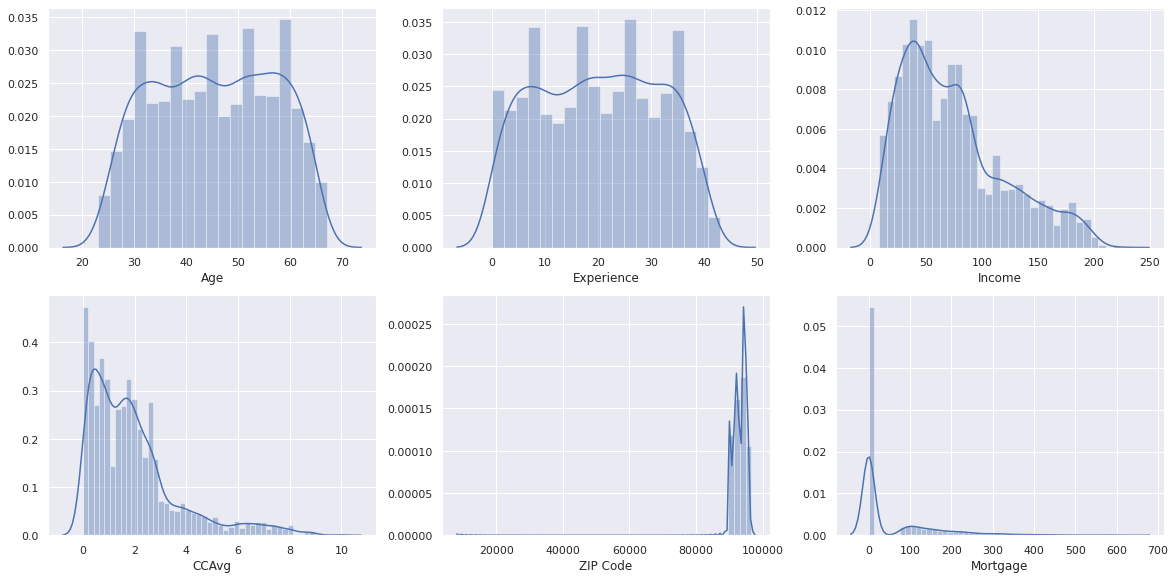

In [ ]:
#To specify figure and font size for the graphs
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1)

#For plotting distribution plots of some attributes in dataset 
plt.subplot(331)
sns.distplot(dataset.Age)

plt.subplot(332)
sns.distplot(dataset.Experience)

plt.subplot(333)
sns.distplot(dataset.Income)

plt.subplot(334)
sns.distplot(dataset.CCAvg)

plt.subplot(335)
sns.distplot(dataset['ZIP Code'])

plt.subplot(336)
sns.distplot(dataset.Mortgage)


1.Age is symmetric distribution.
2.Experience also having symmetric distribution.
3.Income is right skewed distribution.
4.CCAvg is also right skewed distribution.
5.ZIP Code seems highly skewed distribution.
6.Morgage is also highly skewed distribution.

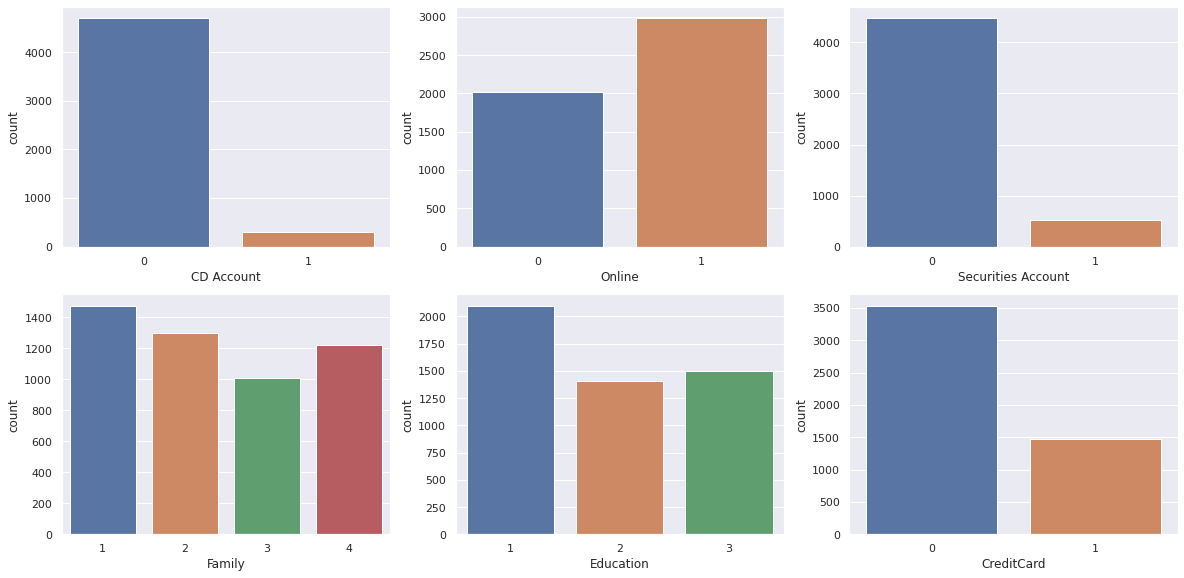

In [ ]:
#To specify figure and font size for the graphs
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1)

#For plotting count plots of some attributes in dataset
plt.subplot(331)
sns.countplot(dataset['CD Account'])

plt.subplot(332)
sns.countplot(dataset.Online)

plt.subplot(333)
sns.countplot(dataset['Securities Account'])

plt.subplot(334)
sns.countplot(dataset.Family)

plt.subplot(335)
sns.countplot(dataset.Education)

plt.subplot(336)
sns.countplot(dataset.CreditCard)

## **Multivariate Analysis**

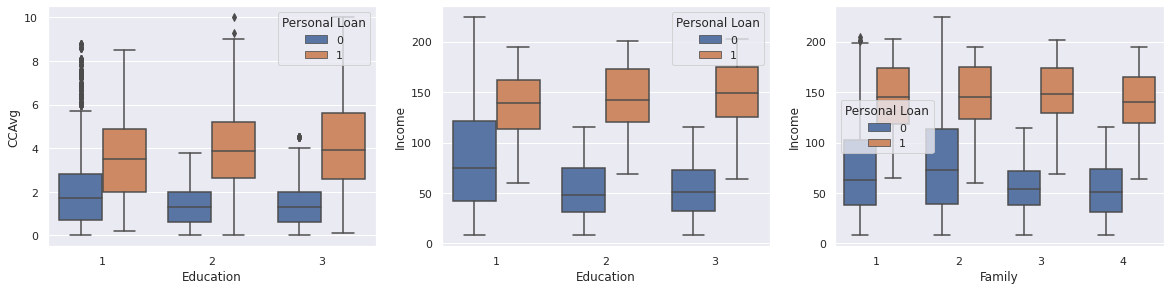

In [ ]:
#To specify figure and font size for the graphs
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1)

#For plotting subplots of some attributes in dataset
plt.subplot(331)
sns.boxplot(x='Education',y='CCAvg',hue='Personal Loan',data=dataset)

plt.subplot(332)
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)

plt.subplot(333)
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=dataset)

1.It seems that customers who has more CCAvg and Income are granted loan across each level of Education.
2.And the customers who has more Income are also granted for loan for each level of Family.

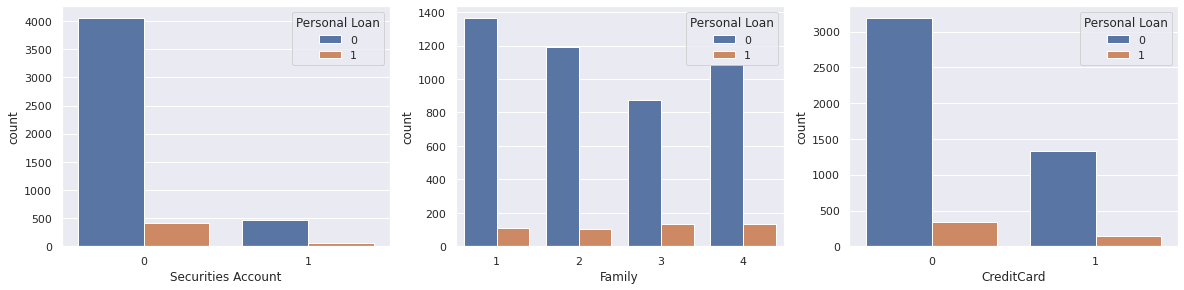

In [ ]:
#To specify figure and font size for the graphs
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1)

#For plotting subplots for some attributes in database
plt.subplot(331)
sns.countplot(x='Securities Account', data=dataset, hue='Personal Loan')

plt.subplot(332)
sns.countplot(x='Family', data=dataset, hue='Personal Loan')

plt.subplot(333)
sns.countplot(x='CreditCard', data=dataset, hue='Personal Loan')

From all above plots we get that majority of people of Family having Securuties Account and CreditCard don't have loan.

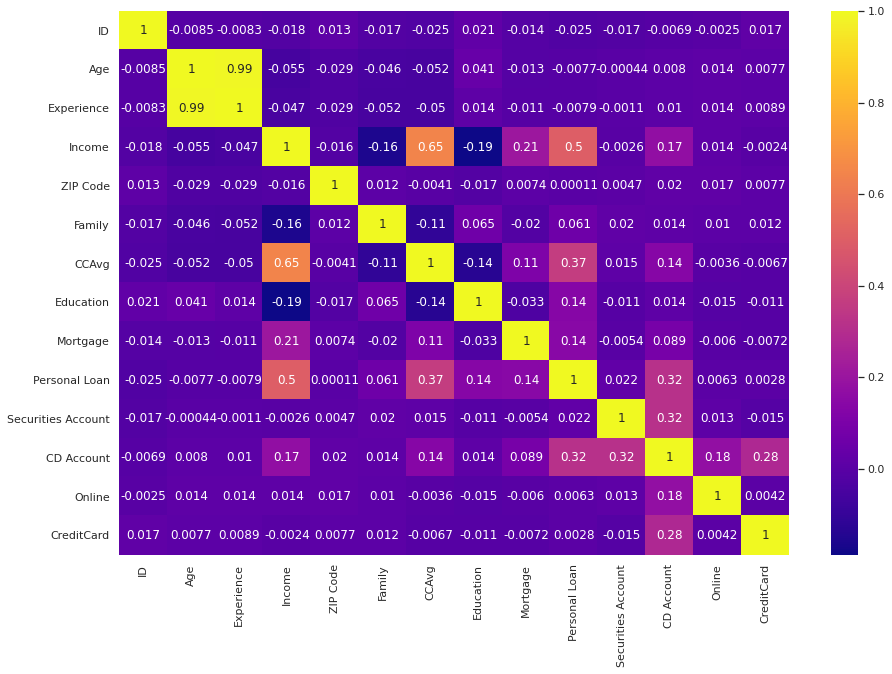

In [ ]:
#For plotting heat map representing correlation between attributes of dataset

fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap='plasma', annot=True)

From above plot we get that Experience and Age variables bears very high corealtion, except Experience and Age variables it doesn't seems to be significant corelation between variables except CCAvg and Income.

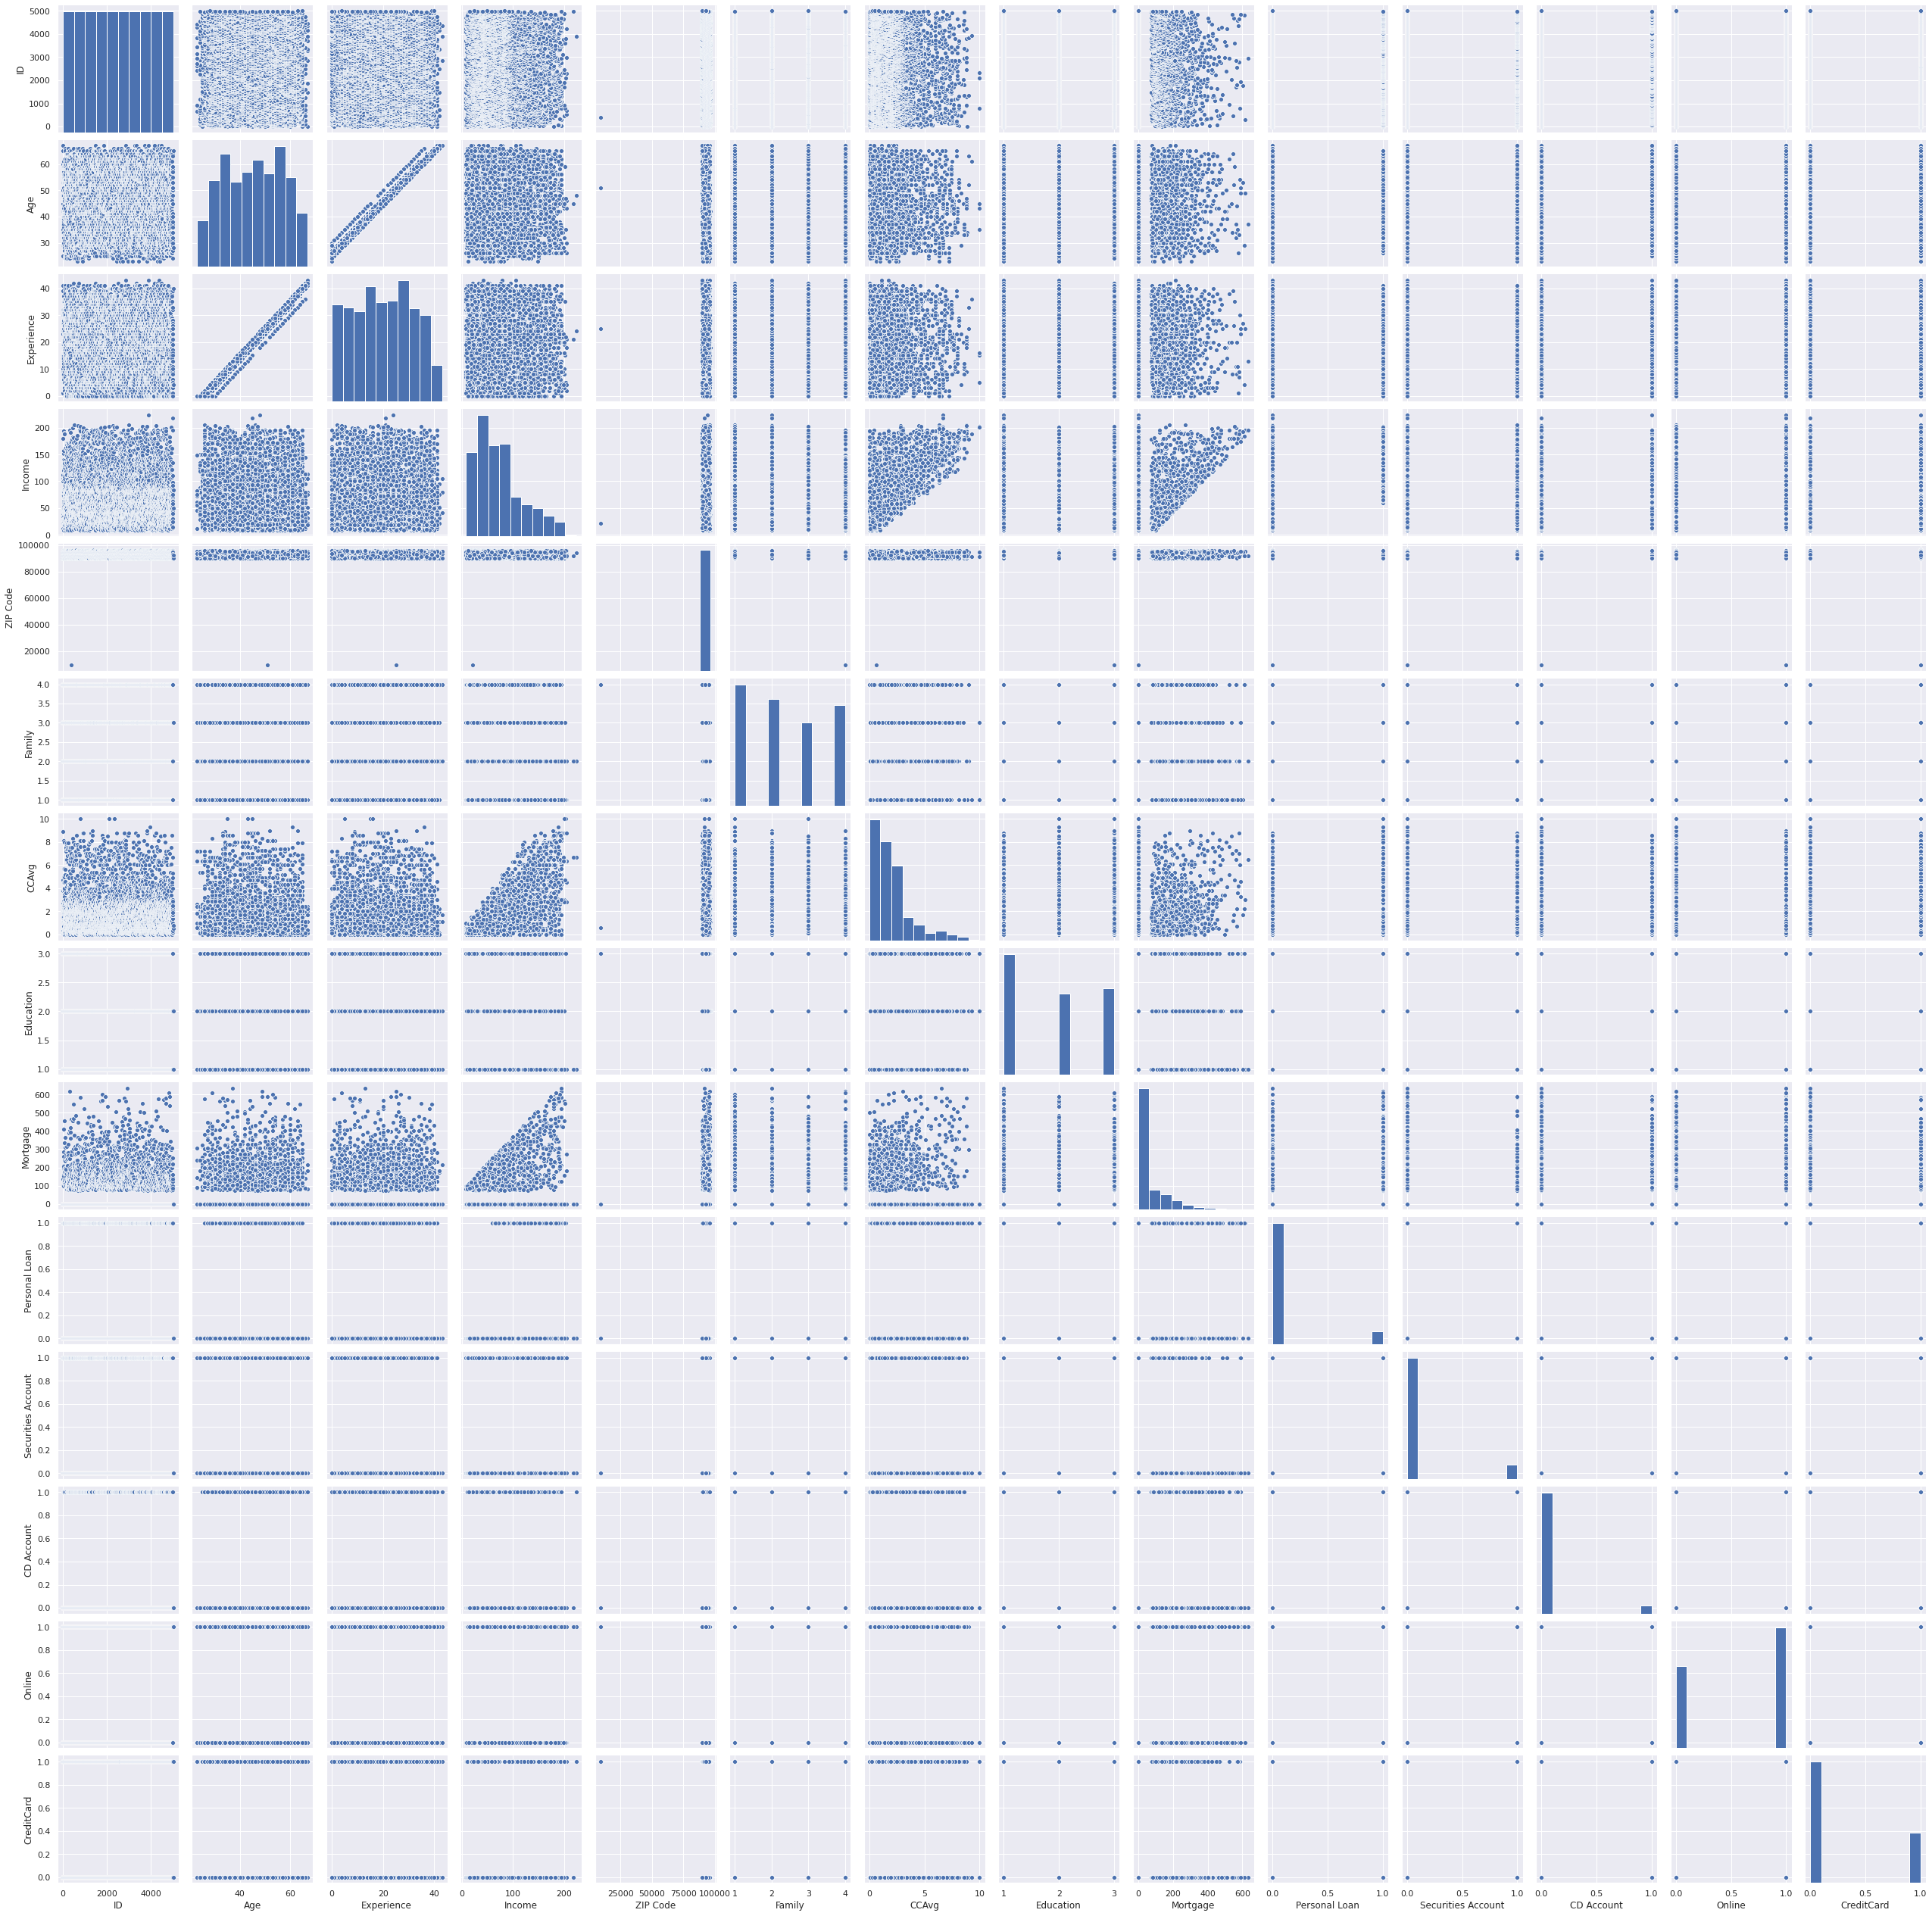

In [ ]:
#To represent pairplot between all the attributes of dataset

sns.pairplot(dataset)

### **Transformation of feature variables**

In [ ]:
from sklearn.preprocessing import PowerTransformer

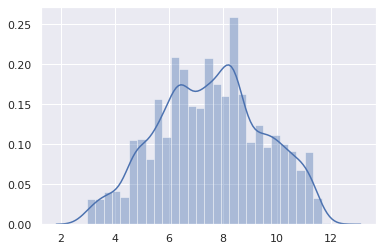

In [ ]:
#Transformation of Income variable with 'yeo-johnson' method

pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(dataset['Income'].values.reshape(-1,1))
temp = pt.transform(dataset['Income'].values.reshape(-1,1))
sns.distplot(temp)

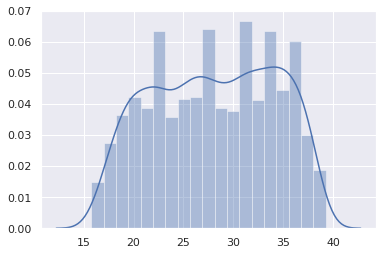

In [ ]:
#Transformation of Age variable with 'yeo-johnson' method

pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(dataset['Age'].values.reshape(-1,1))
temp = pt.transform(dataset['Age'].values.reshape(-1,1))
sns.distplot(temp)

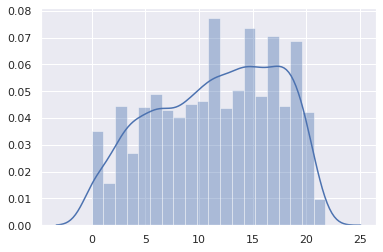

In [ ]:
#Transformation of Experience variable with 'yeo-johnson' method

pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(dataset['Experience'].values.reshape(-1,1))
temp = pt.transform(dataset['Experience'].values.reshape(-1,1))
sns.distplot(temp)

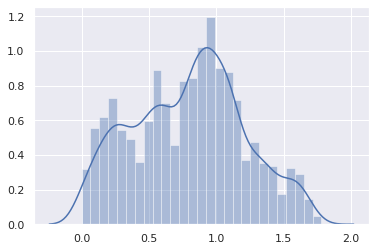

In [ ]:
#Transformation of CCAvg variable with 'yeo-johnson' method

pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(dataset['CCAvg'].values.reshape(-1,1))
temp = pt.transform(dataset['CCAvg'].values.reshape(-1,1))
sns.distplot(temp)

In [ ]:
dataset['Mortgage_Int'] = pd.cut(dataset['Mortgage'],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
dataset.drop('Mortgage', axis=1, inplace=True)

In [ ]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [ ]:
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,0,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0


In [ ]:
dataset.Mortgage_Int.value_counts()

0    3744
1     758
2     297
3     128
4      48
5      21
6       4
Name: Mortgage_Int, dtype: int64

### **Splitting the data using stratified sampling**

In [ ]:
features = ['Age','Income','ZIP Code','Family','CCAvg','Education','Securities Account','Mortgage_Int','Online','CD Account']
X = dataset[features]
y = dataset['Personal Loan']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [ ]:
#Resetting index of train and test datasets

X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

In [ ]:
#To represemt first five rows of train dataset

X_train.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,Mortgage_Int,Online,CD Account
0,51,24,94301,3,0.4,1,0,0,1,0
1,64,35,90266,1,1.5,2,1,0,0,0
2,52,31,94923,4,1.8,1,0,0,1,0
3,32,20,93106,1,0.5,3,0,1,1,0
4,62,54,91320,1,0.8,1,1,0,0,0


In [ ]:
#To represent first five rows of test dataset

X_test.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,Mortgage_Int,Online,CD Account
0,34,180,93023,1,8.9,3,0,0,0,0
1,55,81,92123,2,3.7,1,1,0,0,0
2,48,128,94608,1,5.7,1,1,0,0,0
3,59,102,92677,4,3.0,2,0,1,1,0
4,44,82,95521,2,0.4,1,0,0,1,0


In [ ]:
#Data standardization

from sklearn.preprocessing import StandardScaler
for ind,column in enumerate(X_train.columns):
  scaler = StandardScaler() 

  scaler.fit_transform(X_train[[column]])

  np_array = scaler.transform(X_train[[column]])
  X_train.loc[:, column] = pd.Series(np_array.flatten())

  np_array = scaler.transform(X_test[[column]])
  X_test.loc[:, column] = pd.Series(np_array.flatten())


### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()

In [ ]:
model_1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_predict = model_1.predict(X_test)
y_train_predict = model_1.predict(X_train)
y_test_predict

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

0       1
1       0
2       0
3       1
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: Personal Loan, Length: 1500, dtype: int64

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_test_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))
print('R2 Score', metrics.r2_score(y_test,y_test_predict))

Mean Absolute Error:  0.050666666666666665
Root Mean Squared Error 0.2250925735484551
R2 Score 0.4161750245821042


In [ ]:
print('Accuracy score on X_test : ',metrics.accuracy_score(y_test,y_test_predict))

Accuracy score on X_test :  0.9493333333333334


In [ ]:
print('Accuracy score on X_train : ',metrics.accuracy_score(y_train,y_train_predict))

Accuracy score on X_train :  0.9494285714285714


In [ ]:
print('Classifiaction Report:')
print(classification_report(y_test,y_test_predict))

Classifiaction Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.81      0.62      0.70       144

    accuracy                           0.95      1500
   macro avg       0.88      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
print('Recall Score : ',recall_score(y_test,y_test_predict))

Recall Score :  0.6180555555555556


In [ ]:
print('Precision Score : ',precision_score(y_test,y_test_predict))

Precision Score :  0.8090909090909091


In [ ]:
print('f1 score : ',f1_score(y_test,y_test_predict))

f1 score :  0.7007874015748031


In [ ]:
print('ROC AUC score : ',roc_auc_score(y_test,y_test_predict))

ROC AUC score :  0.8012844149459194


In [ ]:
#To represent Confusion Matrix in proper manner

def draw_cm(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

CONFUSION MATRIX :


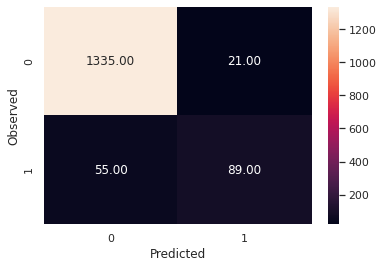

None


In [ ]:
print('CONFUSION MATRIX :')
print(draw_cm(y_test,y_test_predict))

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(random_state=0, max_depth=8)

In [ ]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_test_predict_2 = model_2.predict(X_test)
y_train_predict_2 = model_2.predict(X_train)

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_test_predict_2))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_2)))
print('R2 Score', metrics.r2_score(y_test,y_test_predict_2))

Mean Absolute Error:  0.021333333333333333
Root Mean Squared Error 0.1460593486680443
R2 Score 0.7541789577187807


In [ ]:
print('Accuracy score on X_test : ',metrics.accuracy_score(y_test, y_test_predict_2))

Accuracy score on X_test :  0.9786666666666667


In [ ]:
print('Accuracy score on X_train : ',metrics.accuracy_score(y_train, y_train_predict_2))

Accuracy score on X_train :  0.996


In [ ]:
print('Classifiacation table :')
print(classification_report(y_test,y_test_predict_2))

Classifiacation table :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.88      0.89       144

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
print('Recall score : ',recall_score(y_test,y_test_predict_2))

Recall score :  0.875


In [ ]:
print('Precision score : ',precision_score(y_test,y_test_predict_2))

Precision score :  0.9


In [ ]:
print('f1 score : ',f1_score(y_test,y_test_predict_2))

f1 score :  0.8873239436619719


In [ ]:
print('ROC AUC score : ',roc_auc_score(y_test,y_test_predict_2))

ROC AUC score :  0.9323377581120944


In [ ]:
#To represent Confusion Matrix in proper manner

def draw_cm(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

CONFUSION MATRIX :


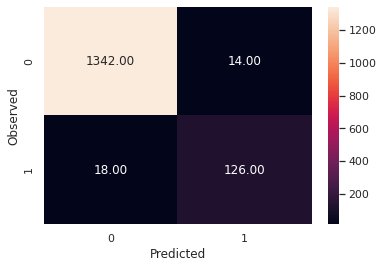

None


In [ ]:
print('CONFUSION MATRIX :')
print(draw_cm(y_test,y_test_predict_2))

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_3 = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=8)

In [ ]:
model_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_test_predict_3 = model_3.predict(X_test)
y_train_predict_3 = model_3.predict(X_train)

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_test_predict_3))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_3)))
print('R2 Score', metrics.r2_score(y_test,y_test_predict_3))

Mean Absolute Error:  0.011333333333333334
Root Mean Squared Error 0.10645812948447542
R2 Score 0.8694075712881022


In [ ]:
print('Accuracy score on X_test : ',metrics.accuracy_score(y_test, y_test_predict_3))

Accuracy score on X_test :  0.9886666666666667


In [ ]:
print('Accuracy score on X_train : ',metrics.accuracy_score(y_train, y_train_predict_3))

Accuracy score on X_train :  0.9948571428571429


In [ ]:
print('Classification report :')
print(classification_report(y_test,y_test_predict_3))

Classification report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.99      0.89      0.94       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
print('Recall score : ',recall_score(y_test,y_test_predict_3))

Recall score :  0.8888888888888888


In [ ]:
print('Precision score : ',precision_score(y_test,y_test_predict_2))

Precision score :  0.9


In [ ]:
print('f1 score : ',f1_score(y_test,y_test_predict_2))

f1 score :  0.8873239436619719


In [ ]:
print('ROC AUC score : ',roc_auc_score(y_test,y_test_predict_2))

ROC AUC score :  0.9323377581120944


In [ ]:
#To represent Confusion Matrix in proper manner

def draw_cm(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

CONFUSION MATRIX:


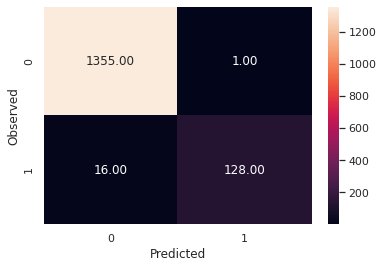

None


In [ ]:
print('CONFUSION MATRIX:')
print(draw_cm(y_test,y_test_predict_3))

### **Buisness Understanding**

1)From all the graphs plotted above we can say that,

*   Customers of age between 30-60 and with average experience have high probability of purchasing loans. 
*   Also it seems that customers with average Credit card average and income are having good probablity of purchasing loans over every level of education.
*   Families having high income are also able to purchase loans.




So from all above observations it is beneficial for us to arrange campaign for those customers whose age are between 30-60 having enough experience, also having good income and credit card average.
So that we can increase rate of selling loans and can save most of the cost for the campaign.

2)After comparing all the above models we get that,

FOR LOGISTIC REGRESSION MODEL:

1.   Accuracy score on test data is 94.93%.
2.   Accuracy score on train data is 94.94%.
3.   Recall Score :  0.6180555555555556
4.   Precision Score :  0.8090909090909091
5.   f1 score :  0.7007874015748031
6.   ROC AUC score :  0.8012844149459194
**************************************************

FOR DECISION TREE MODEL:


1.   Accuracy score on test data is 97.86%.
2.   Accuracy score on train data is 99.60%.
3.   Recall score :  0.875
4.   Precision score :  0.9
5.   f1 score :  0.8873239436619719
6.   ROC AUC score :  0.9323377581120944

**************************************************

FOR RANDOM FOREST MODEL:


1.   Accuracy score on test data is 99.86%.
2.   Accuracy score on train data is 99.48%.
3.   Recall score :  0.8888888888888888
4.   Precision score :  0.9
5.   f1 score :  0.8873239436619719
6.   ROC AUC score :  0.9323377581120944







From these results, it would suggest that Random Forest analysis is perhaps worthy of further study on this problem.

*********************************************************************
*************************************************************************